# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

#### Import libraries and data

In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
data_link = 'D:\DTU\SP 2023\Social Data Viz\Data'
data = pd.read_csv(data_link+'\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# frist 14 columns
df = data.iloc[:, :14] 
df.loc[:, 'Date'] = pd.to_datetime(df['Date']) # convert date column to datetime object

# Filter date # 'YYYY-MM-DD'
start_date = pd.to_datetime('2003-01-01')
end_date = pd.to_datetime('2017-12-31')

df = df[ (df['Date'] >= start_date) & (df['Date'] <= end_date)]

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes = sorted(focuscrimes)

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [5]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.DayOfWeek = pd.Categorical(df.DayOfWeek, categories=order, ordered=True) #change type to catagorical for better order.

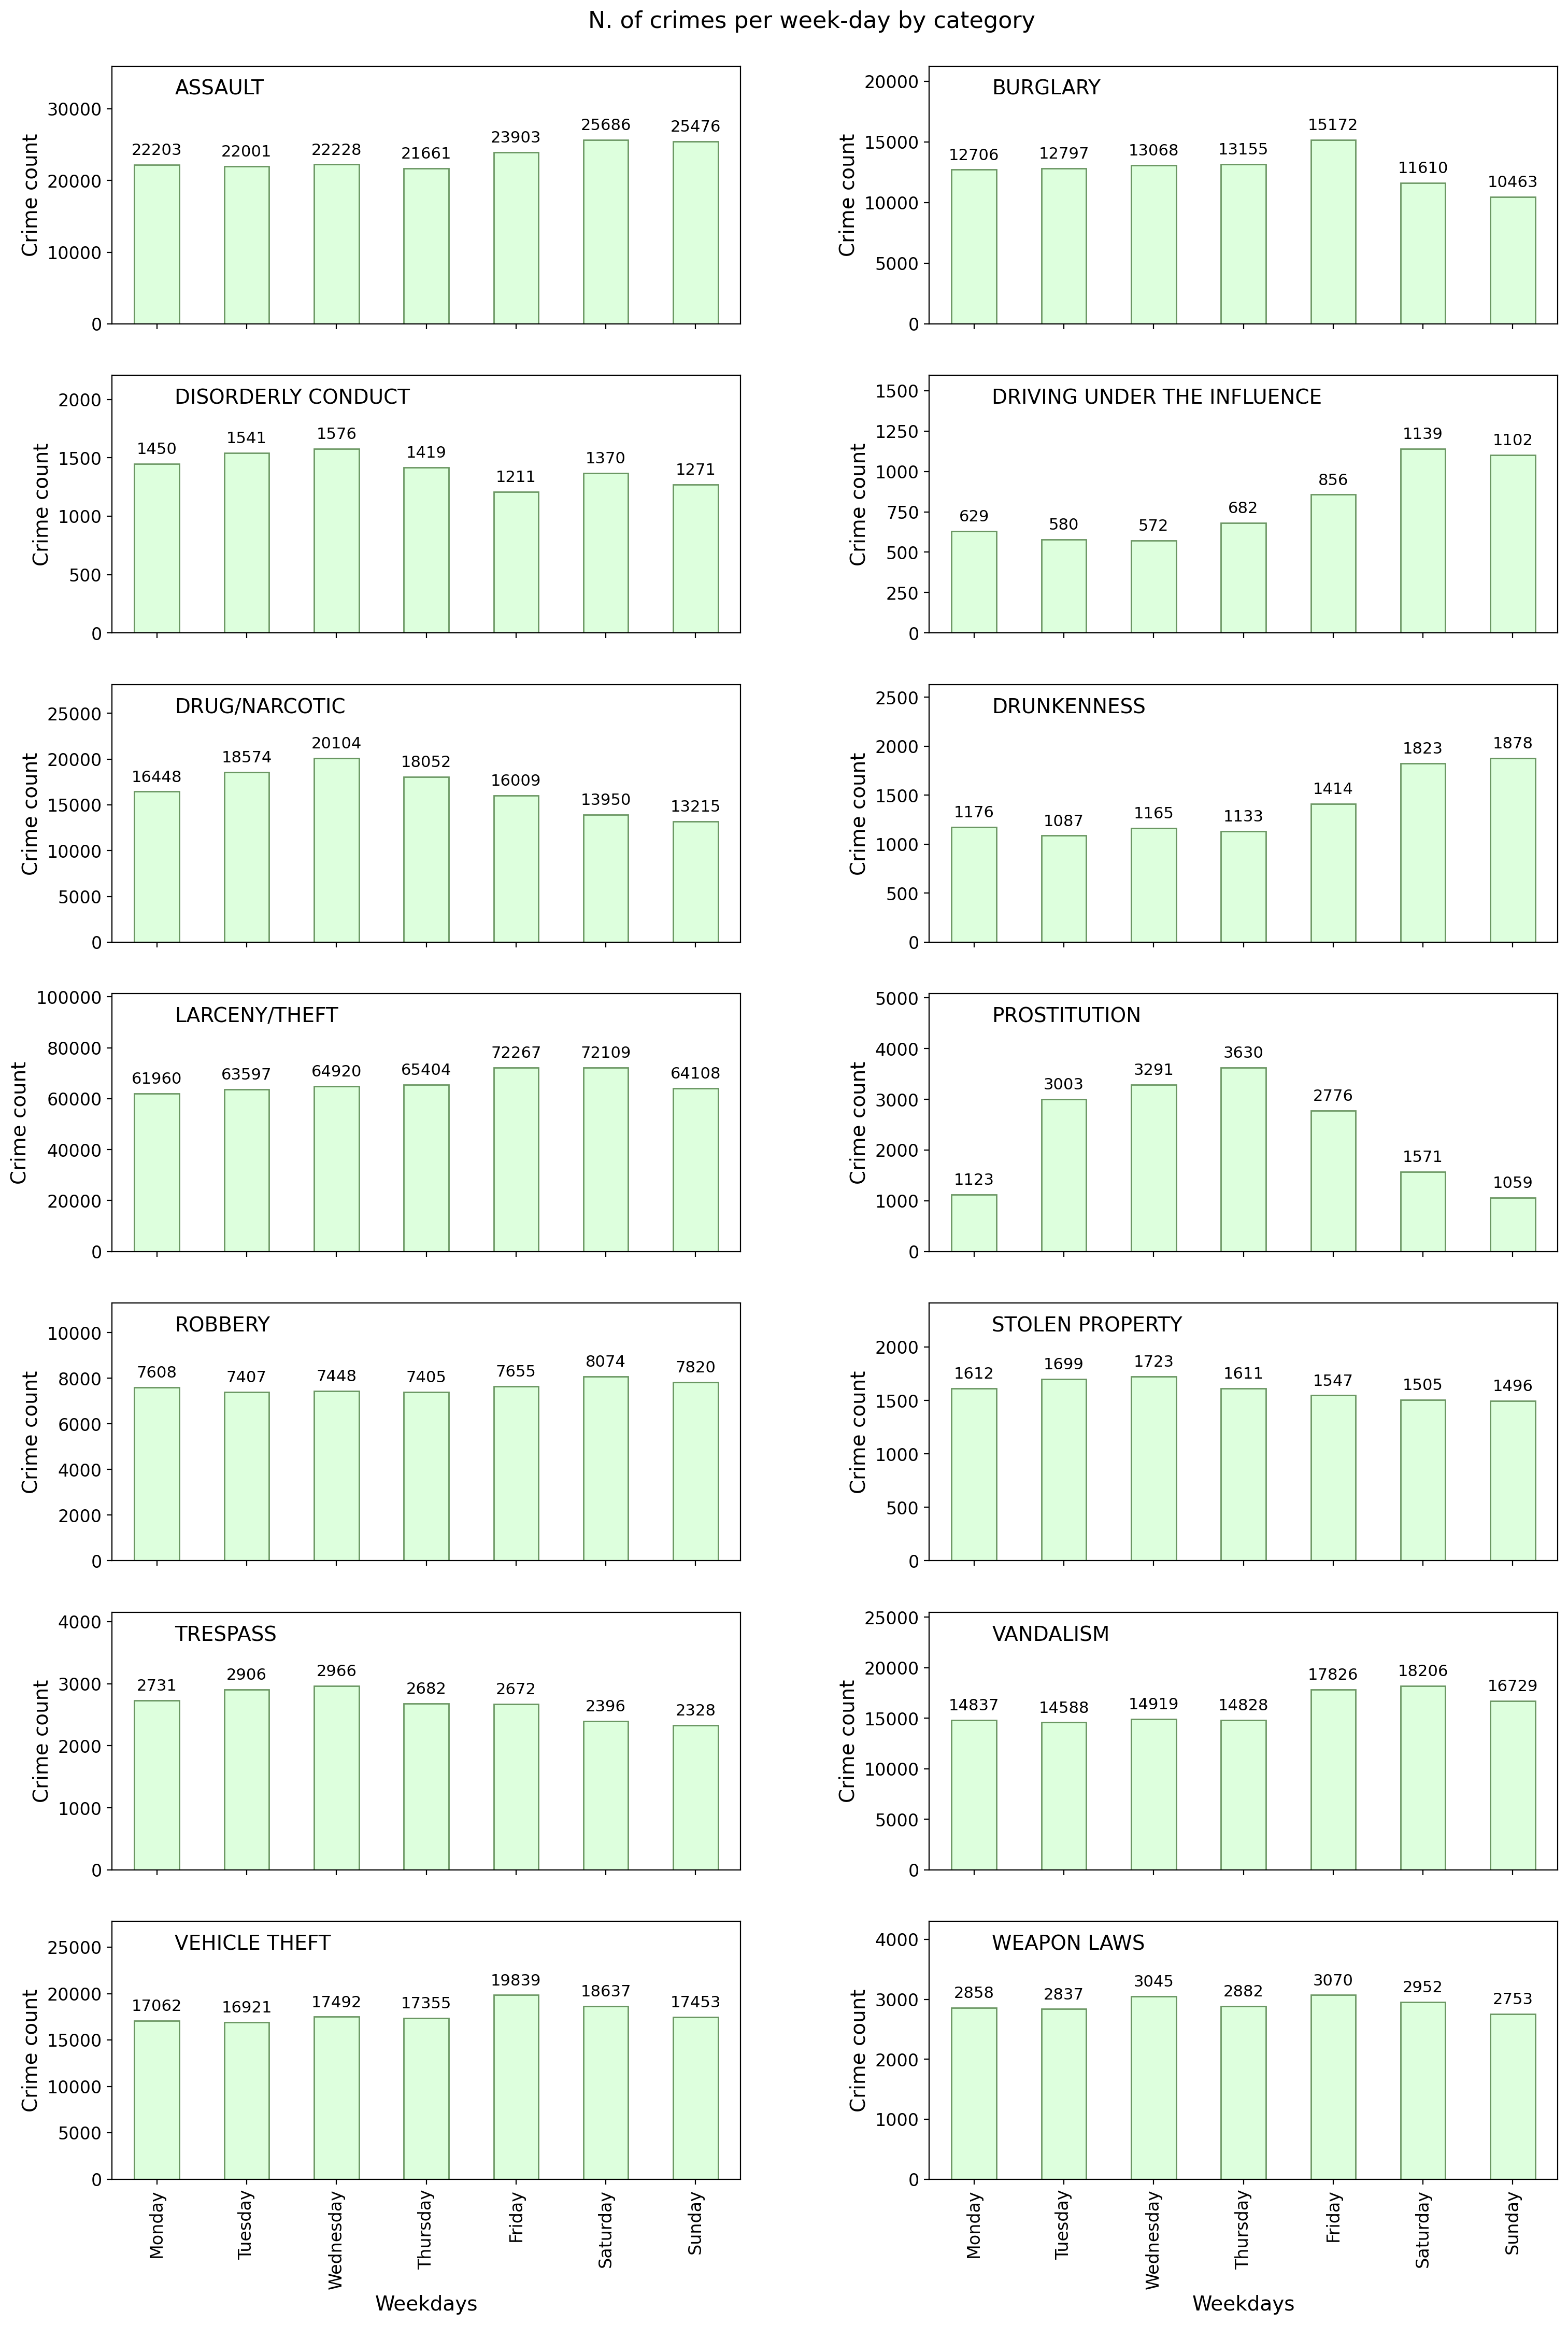

In [14]:
#First create the week-day plots,
# thorugh pandas plot

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False) 

fig.subplots_adjust( wspace=.3, hspace=.2 ) #adjust placing
plt.suptitle('N. of crimes per week-day by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()): 
    ab = df[df['Category'] == focuscrimes[index]].DayOfWeek.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4) #side margins
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Weekdays', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches: # Labelling
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11)
        
# Labelling ref: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars

In [ ]:
# months plot


In [15]:
import calendar
df['MonthName'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x]) #

df.MonthName = pd.Categorical(df.MonthName, categories=calendar.month_name[1:13], ordered=True)

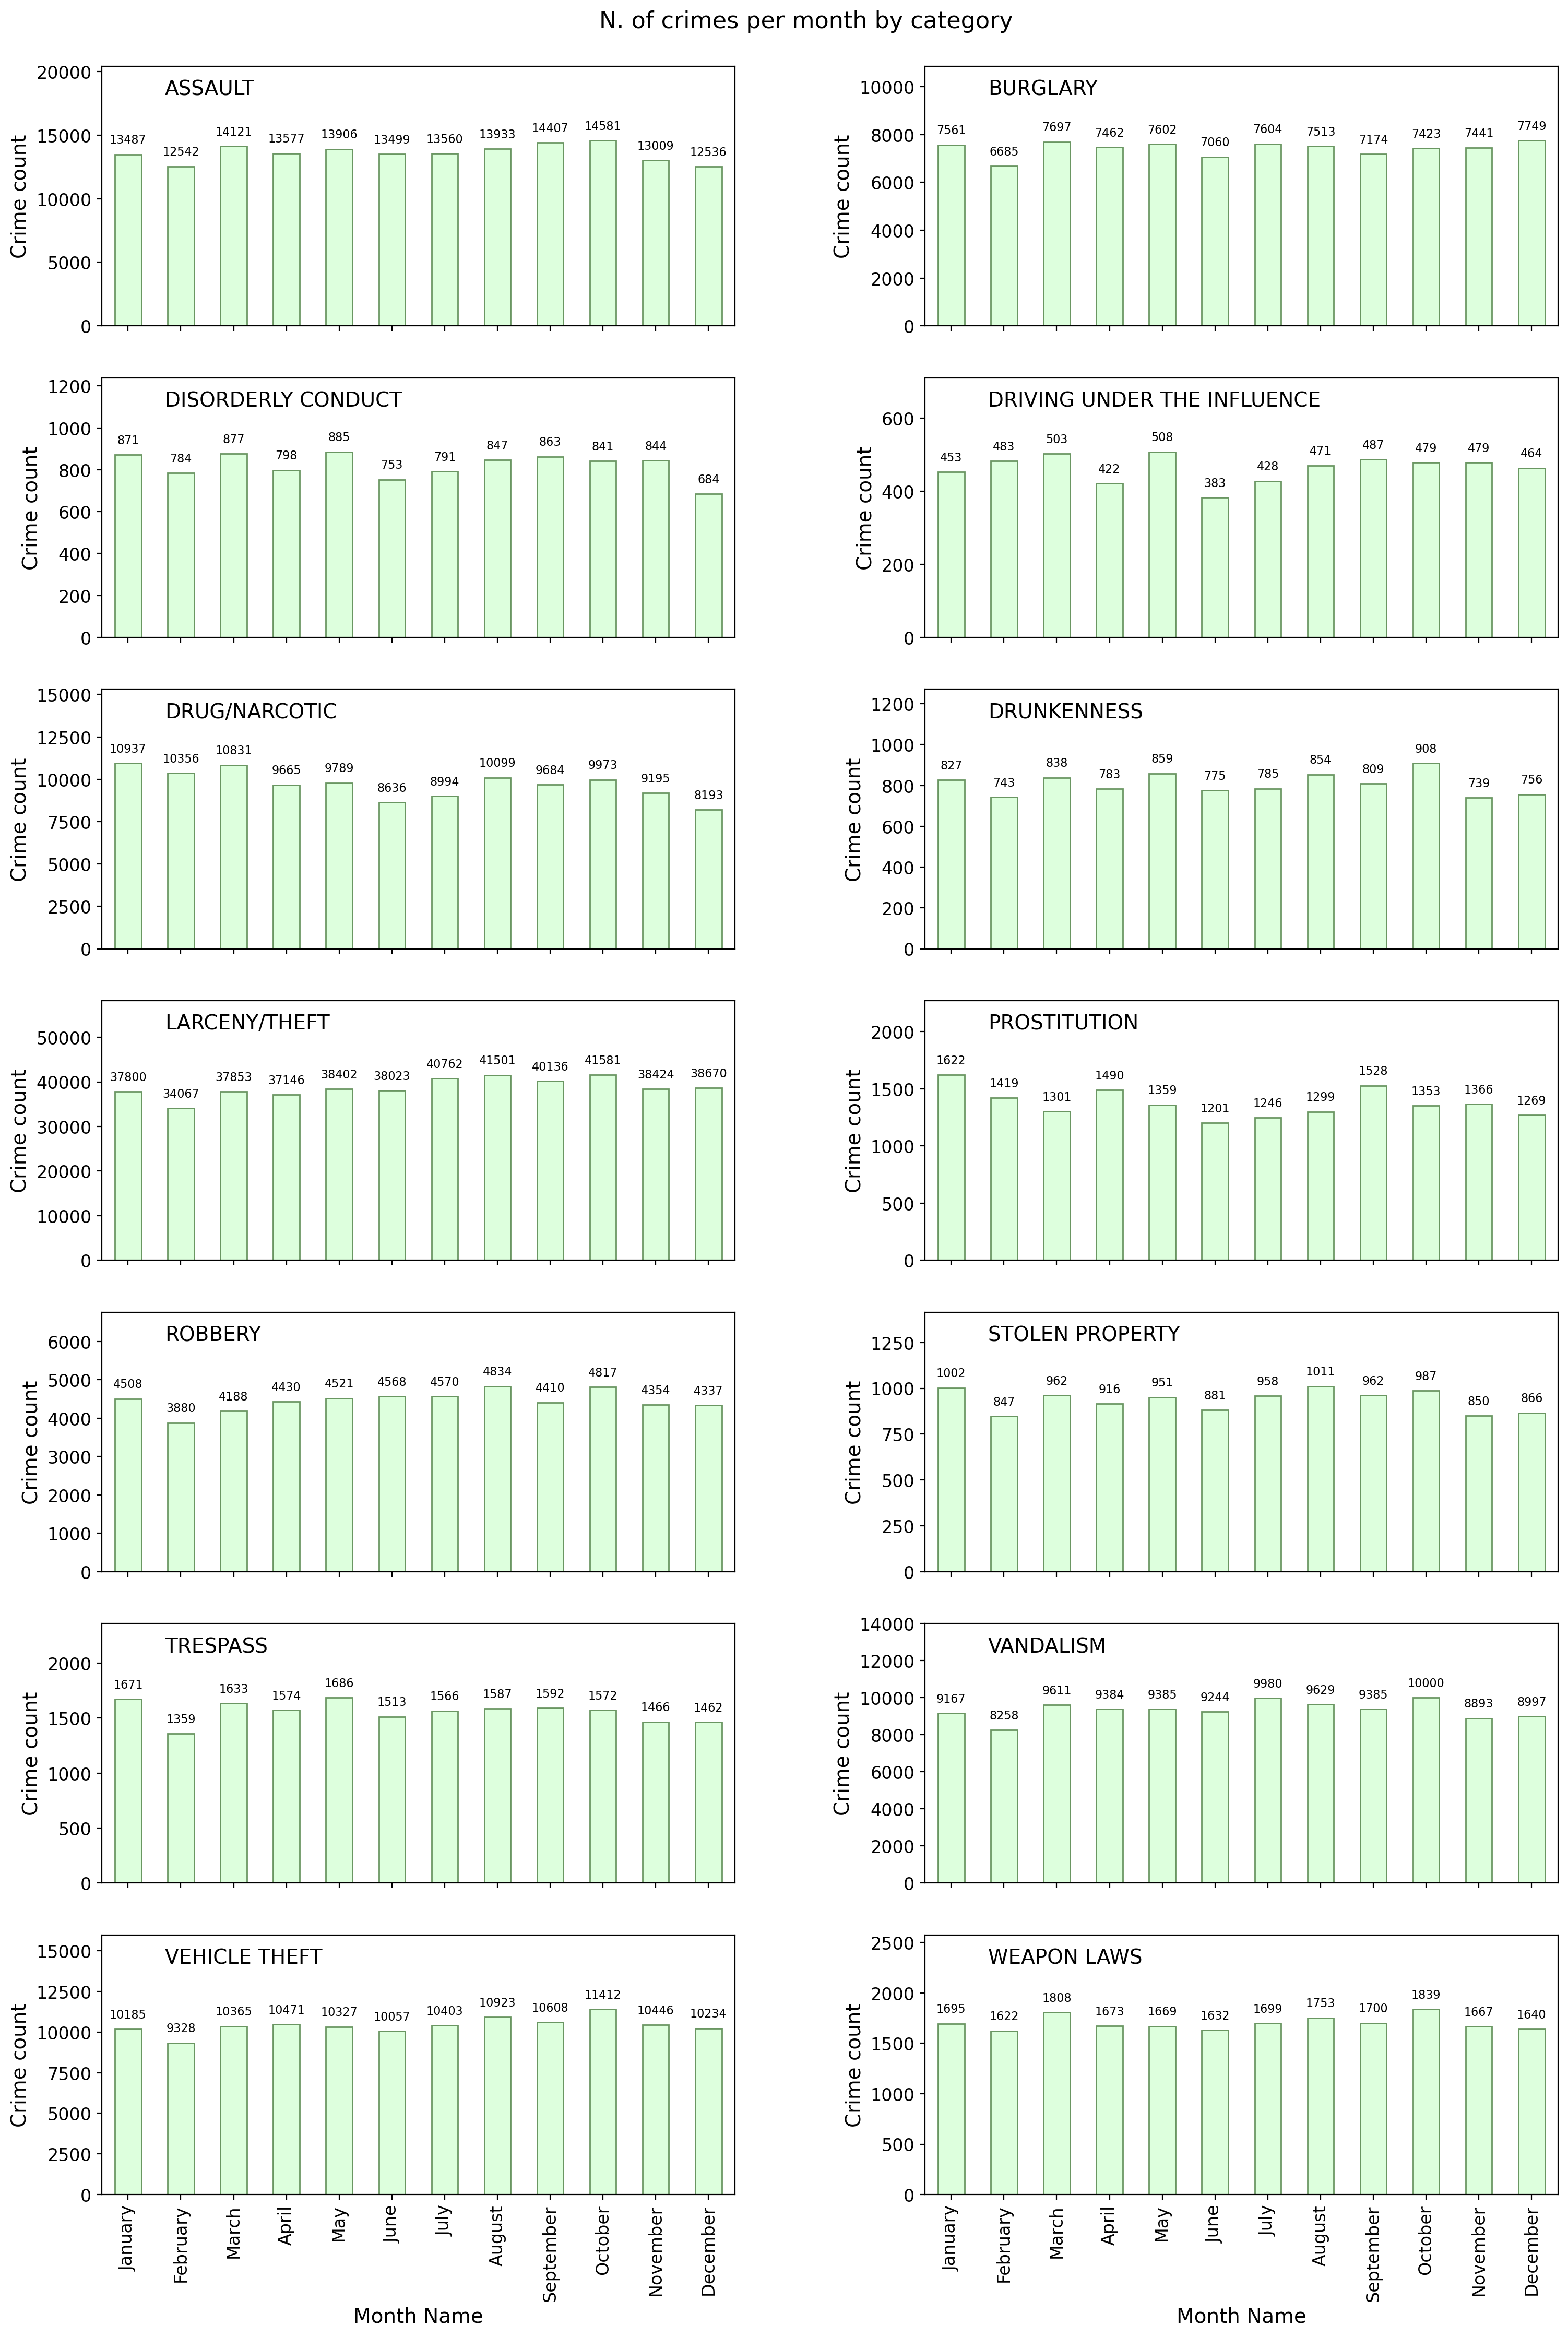

In [16]:
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 ) #adjust placing
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].MonthName.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4)  #side margins
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Month Name', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches: # Labelling, ref given above
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

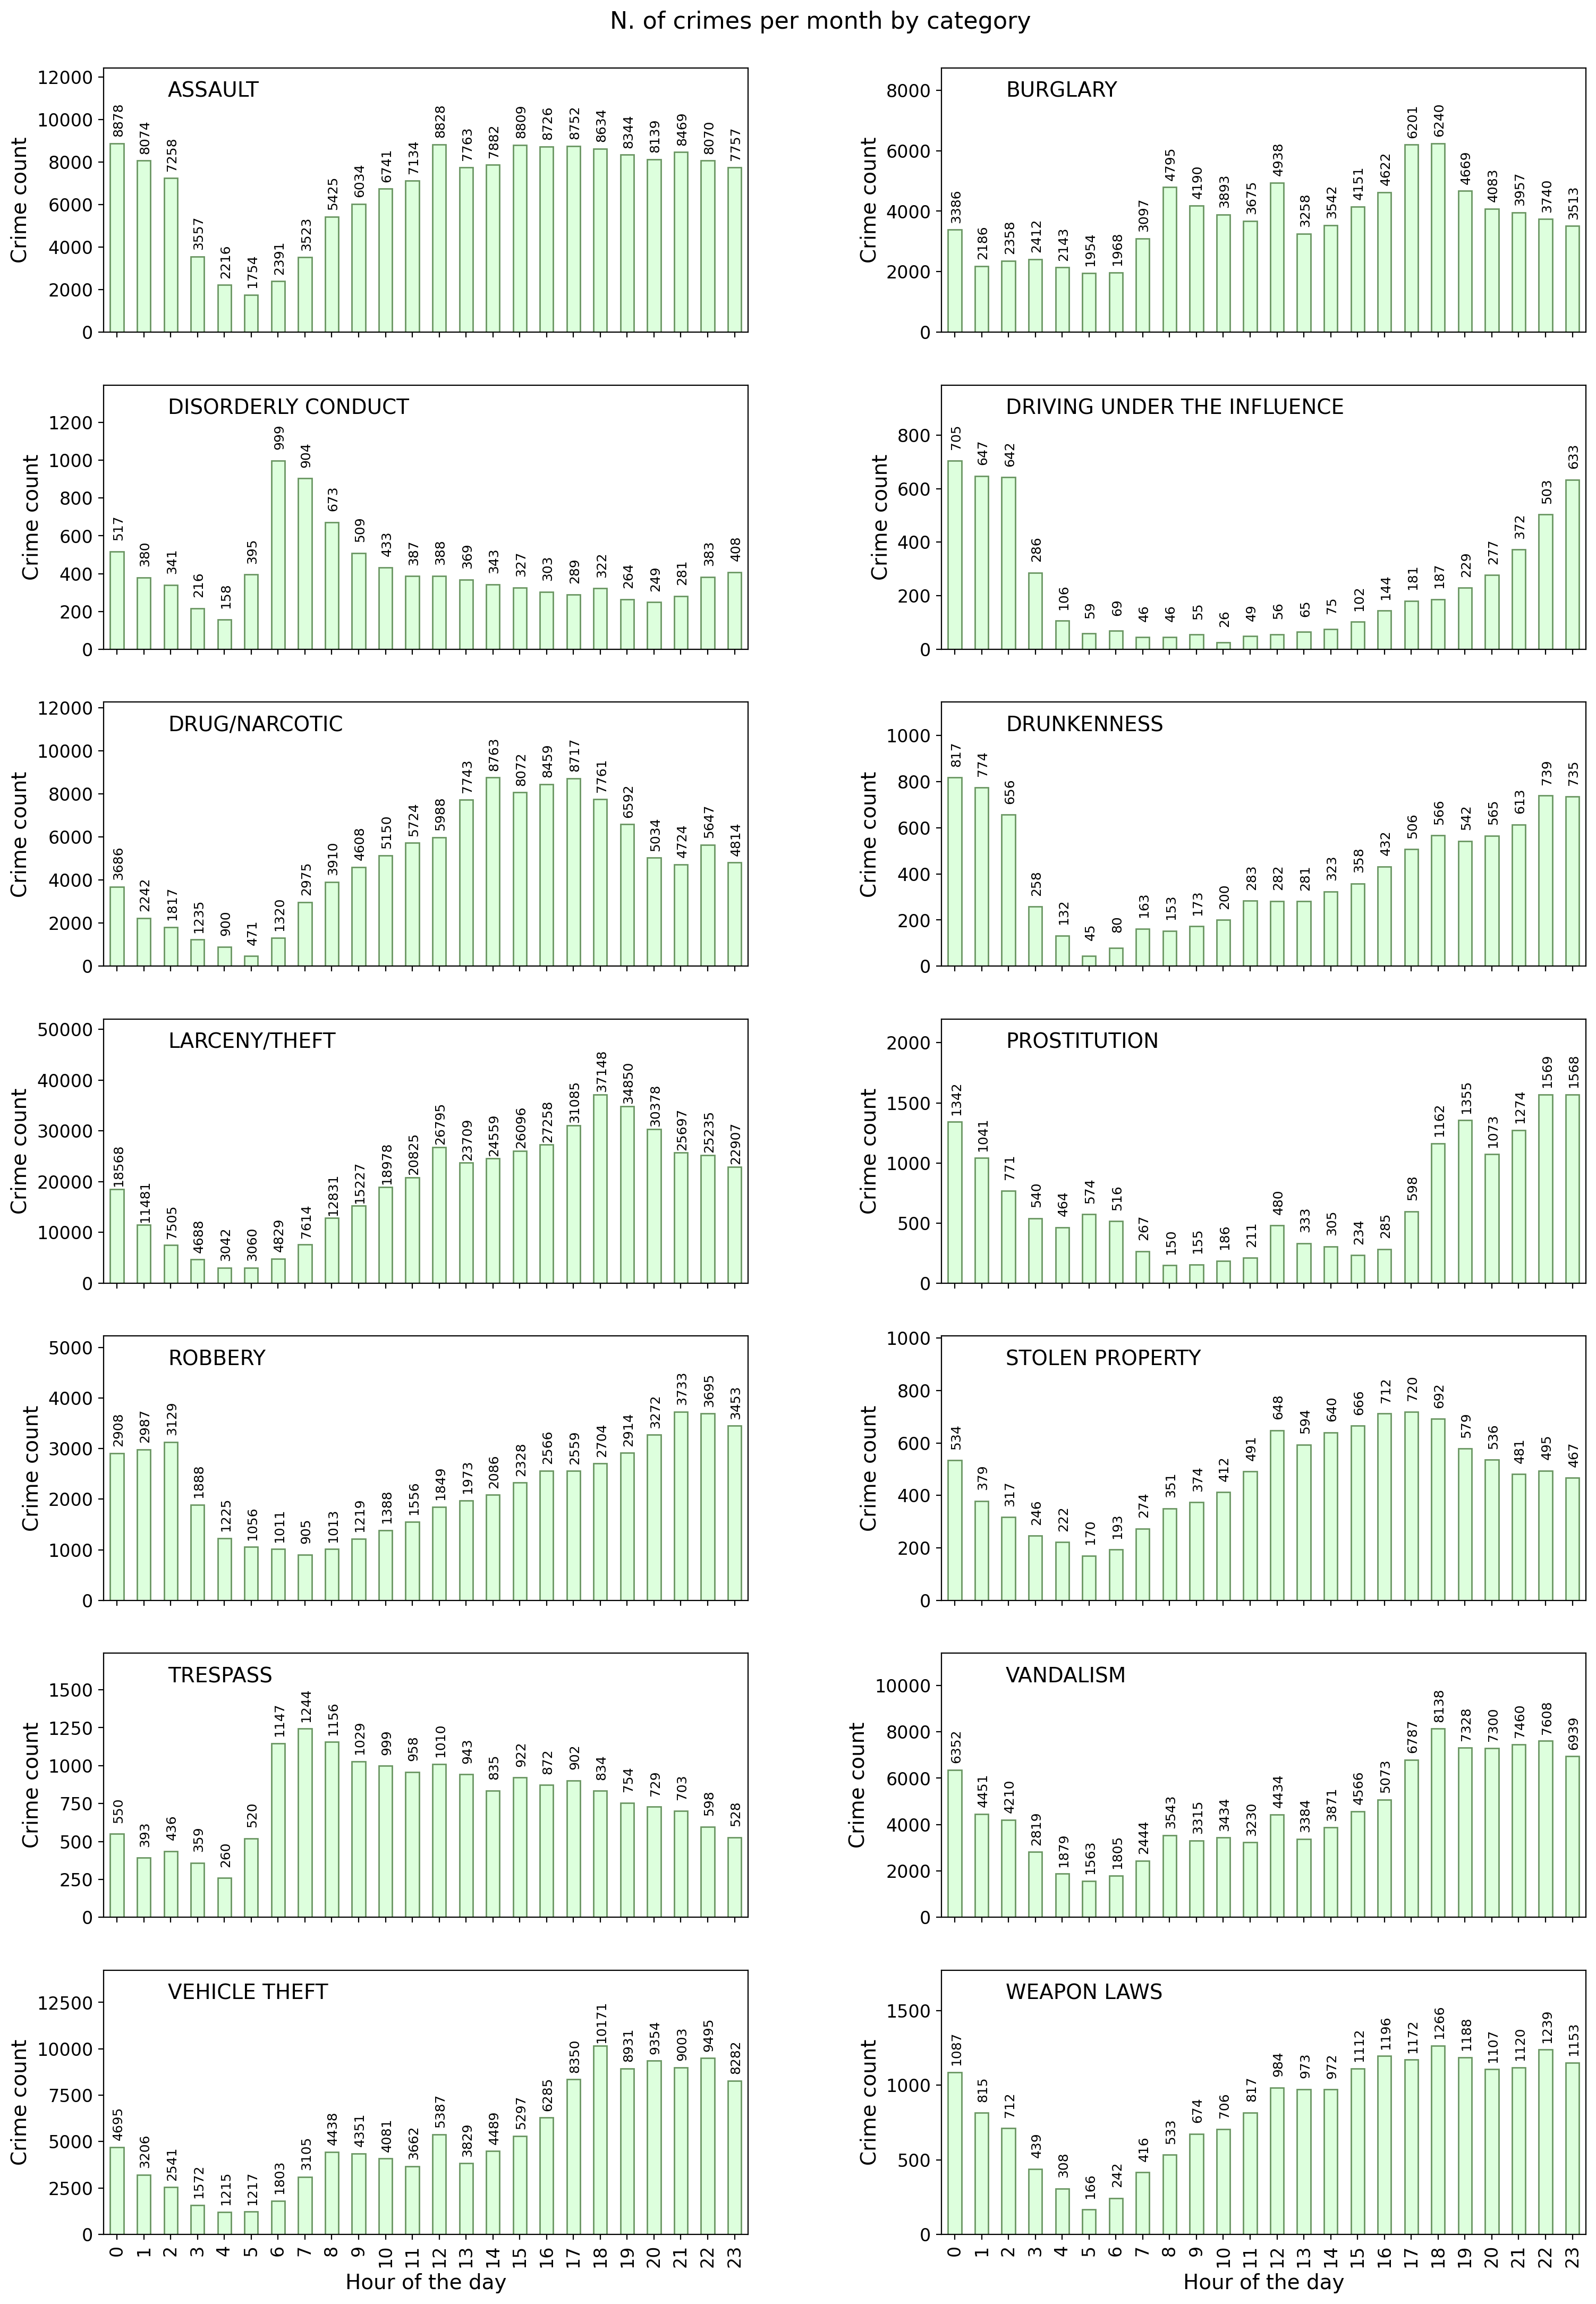

In [25]:
# the 24-hour cycle
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour # 

fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 ) #adjust placing
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].hour.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(0.04,0.4) #side margins
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14)
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Hour of the day', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)
    
    for p in axes.patches: # Labelling, ref given above
        axes.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(1, 16), textcoords='offset points', fontsize=9, rotation=90)

In [26]:
# 168 hours of the week 
df['DayOfWeek']=df['DayOfWeek'].astype('str')
df['HourOfWeek'] = df['DayOfWeek'].map(lambda x: {'Monday': 0, 'Tuesday': 24, 'Wednesday': 48, 'Thursday': 72, 'Friday': 96, 'Saturday': 120, 'Sunday': 144}[x]) + df['hour']

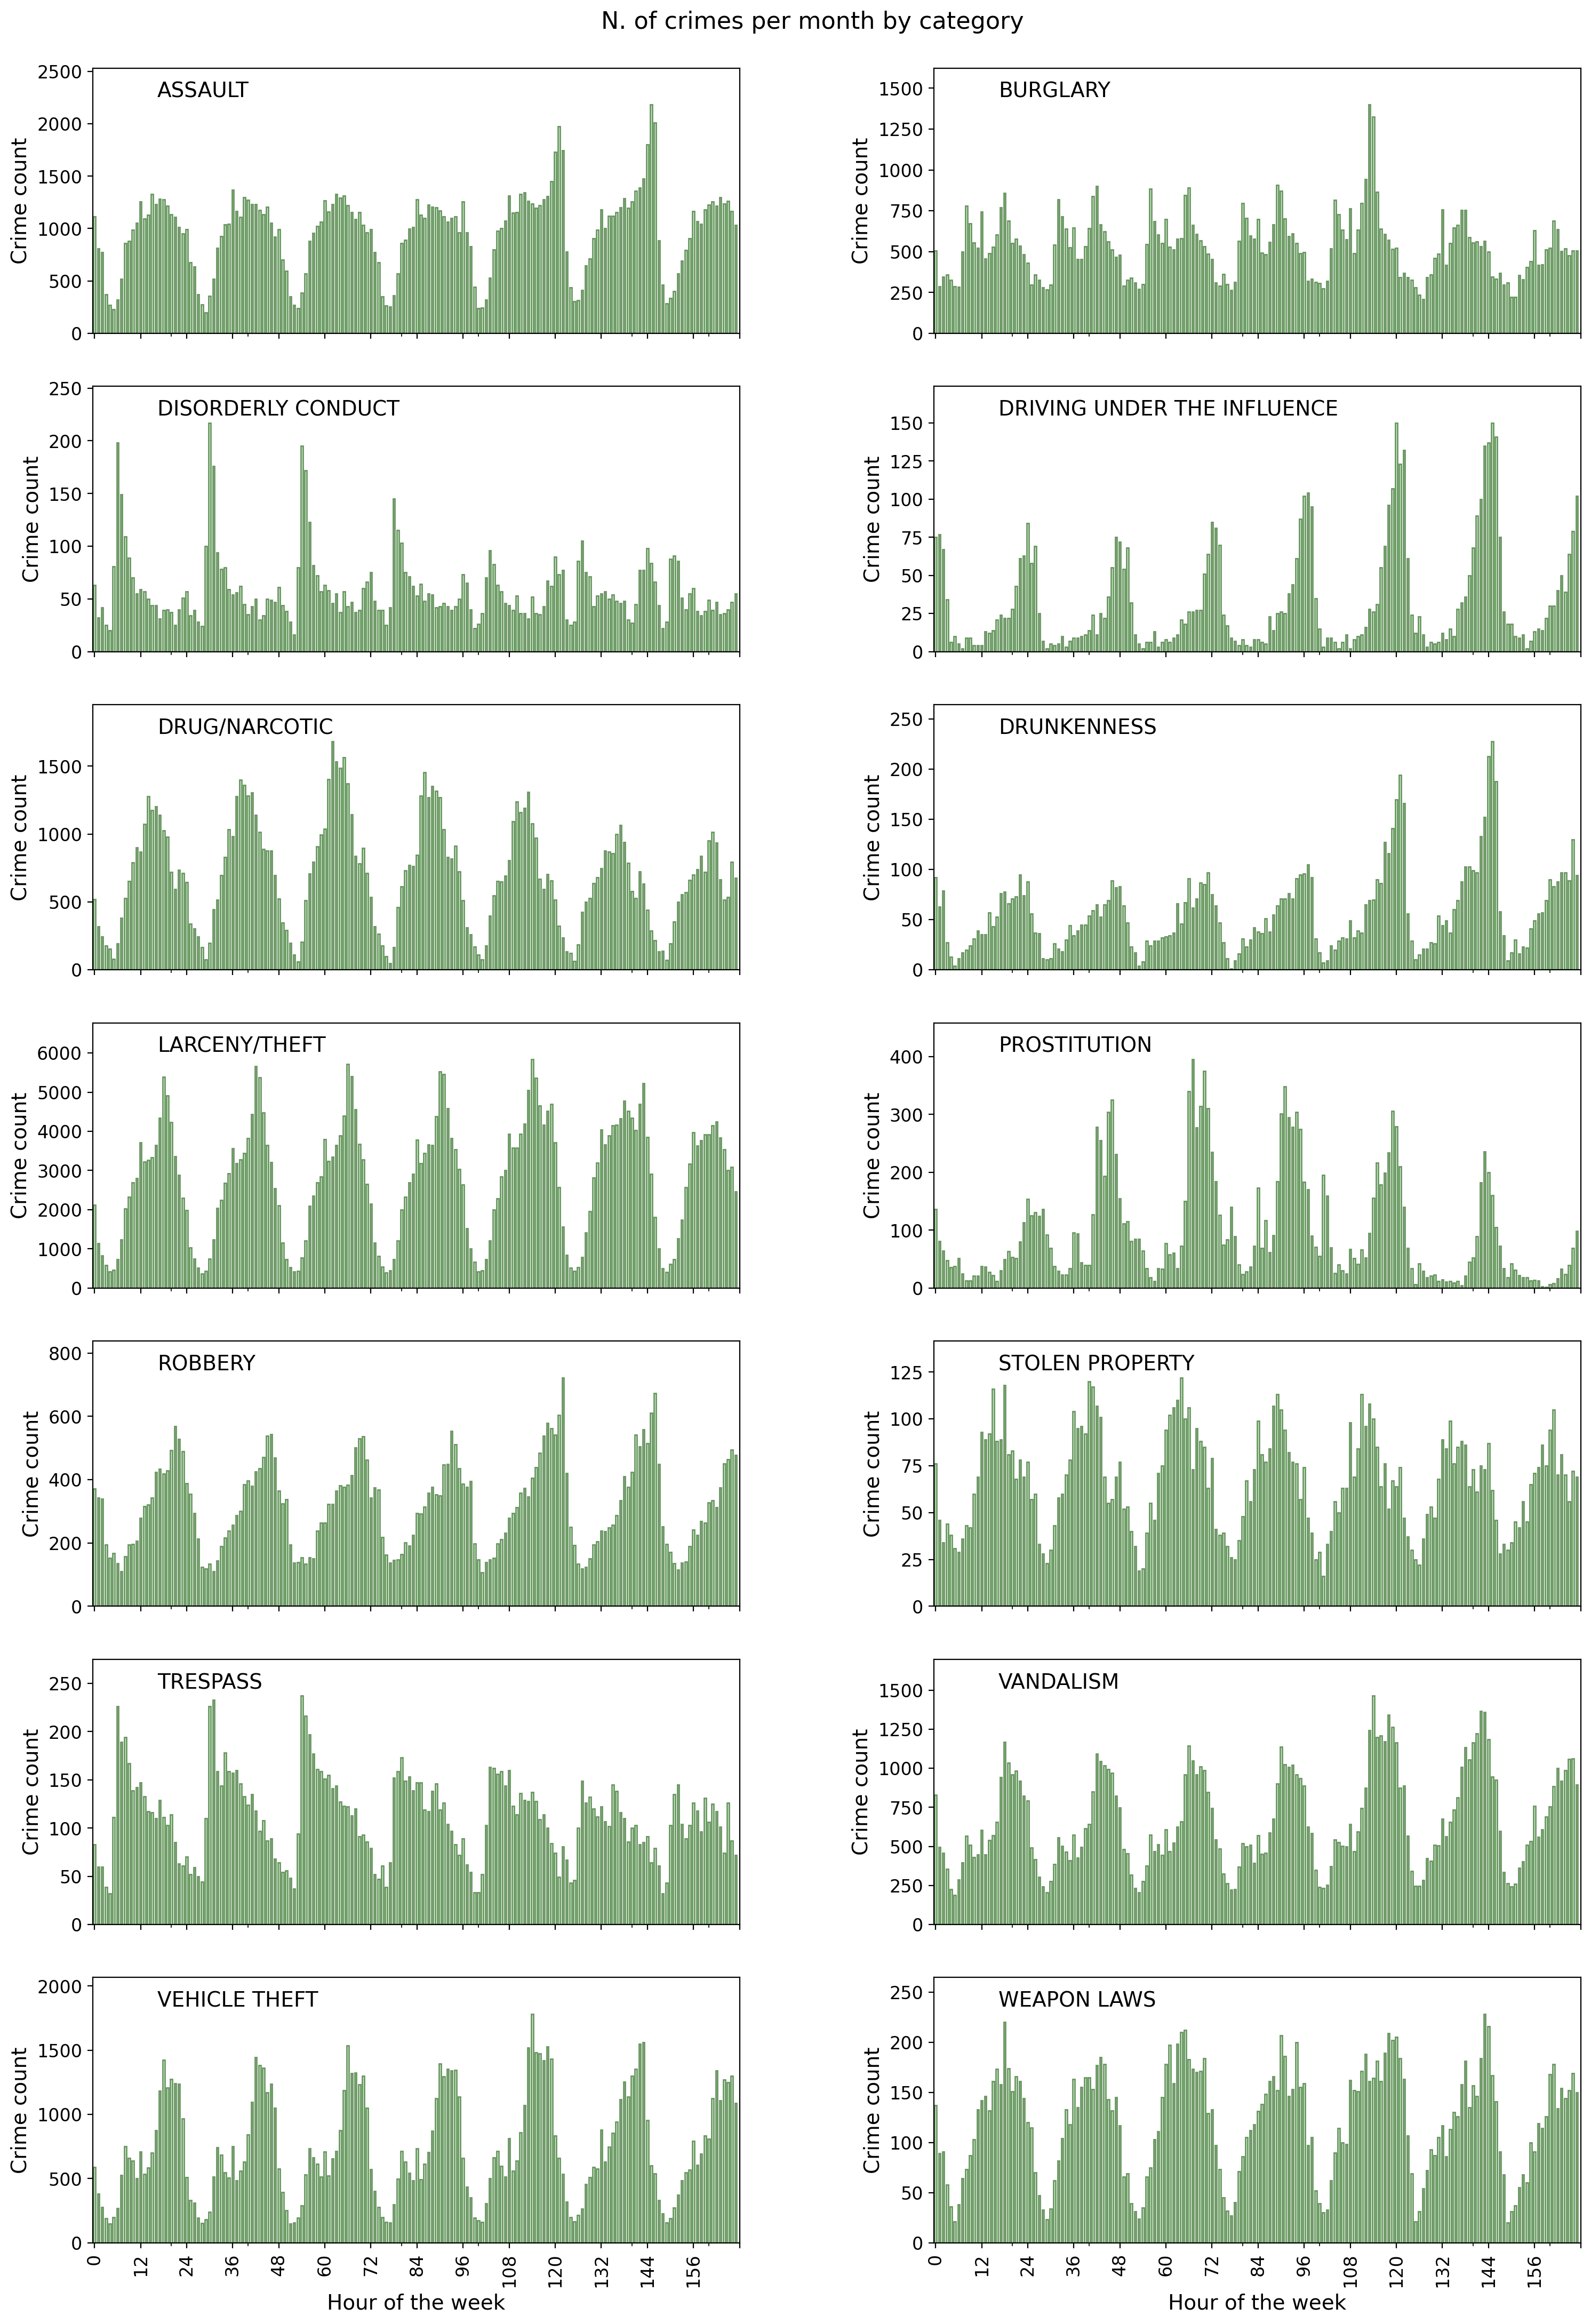

In [62]:
fig, ax = plt.subplots(7,2, figsize=(18,27), dpi=200 , sharex=True, sharey=False)

fig.subplots_adjust( wspace=.3, hspace=.2 )  #adjust placing
plt.suptitle('N. of crimes per month by category', fontsize=16, y=0.9);

for index, axes in enumerate(ax.flatten()):
    ab = df[df['Category'] == focuscrimes[index]].HourOfWeek.value_counts().sort_index().plot(kind='bar'
                                                                           ,ax=axes,color='#DDFFDD', edgecolor="#6A9662");
    axes.margins(1,0.16) #side margins
    #axes.set_xlim(0, df.HourOfWeek.max() + 5)
    axes.text(0.1,0.95,focuscrimes[index],transform=axes.transAxes, va='top', fontsize=14) # text inside plot
    axes.set_xticks(np.arange(0,169,12))
    axes.tick_params(axis='both', which='major', labelsize=12)
    axes.set_xlabel('Hour of the week', fontsize=14)
    axes.set_ylabel('Crime count', fontsize=14)

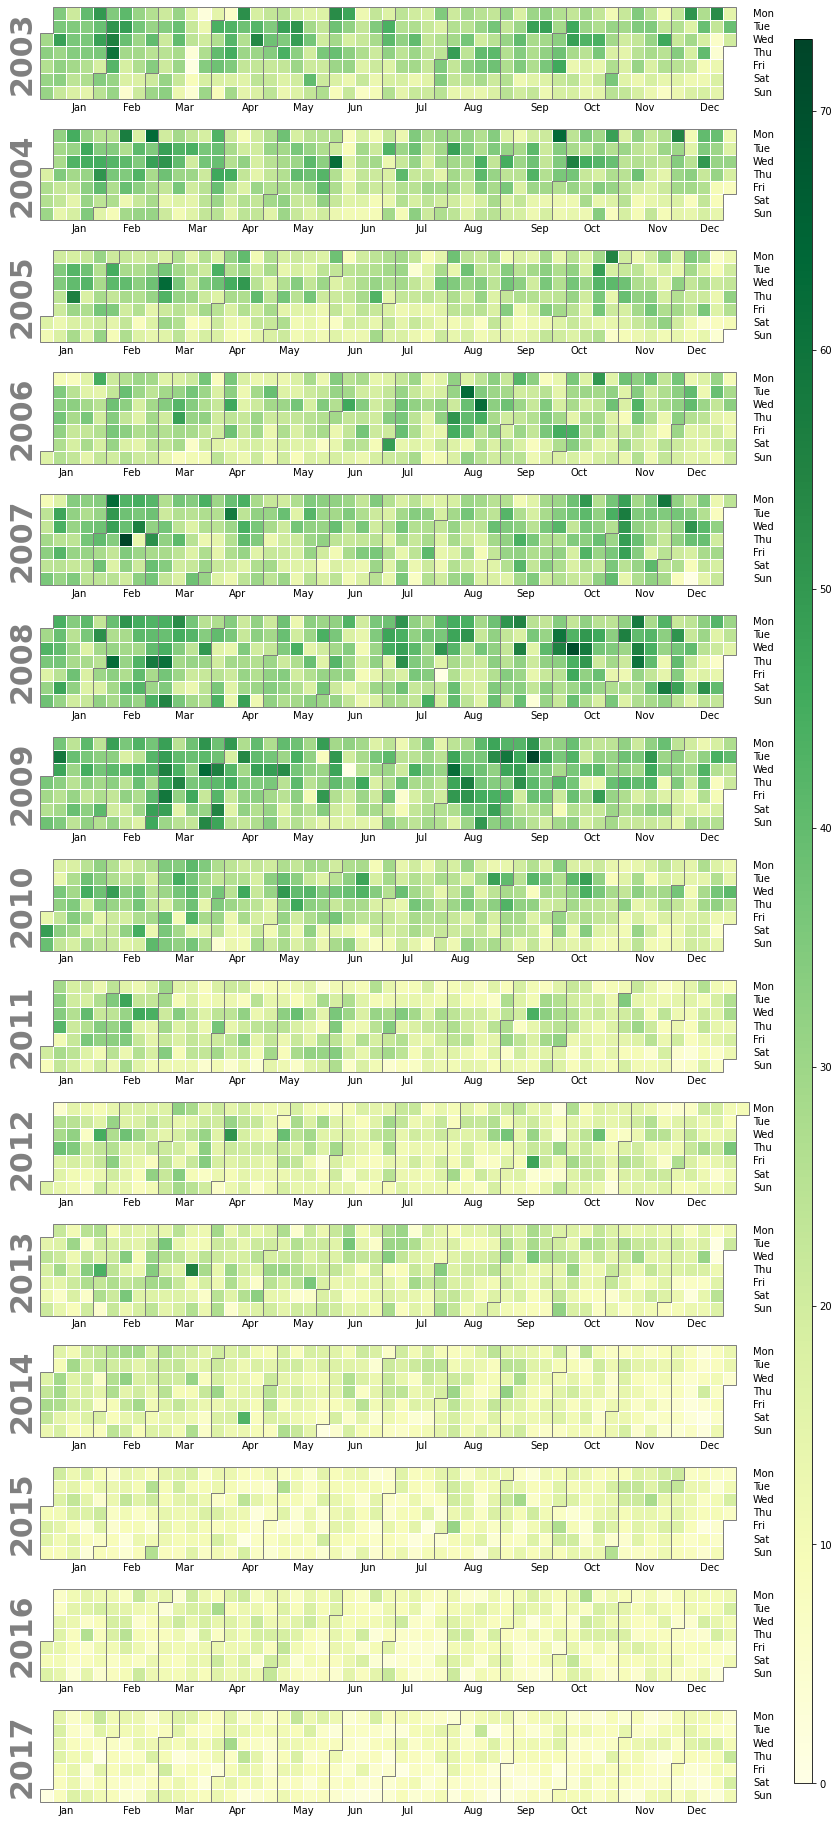

In [88]:
import calplot

df_trg = df[df['Category'] == 'DRUG/NARCOTIC'].copy()
df_trg['Date'] = pd.to_datetime(df_trg['Date'])
calplot.calplot(df_trg['Date'].value_counts(),cmap='YlGn', colorbar=True);

<AxesSubplot:xlabel='year', ylabel='count'>

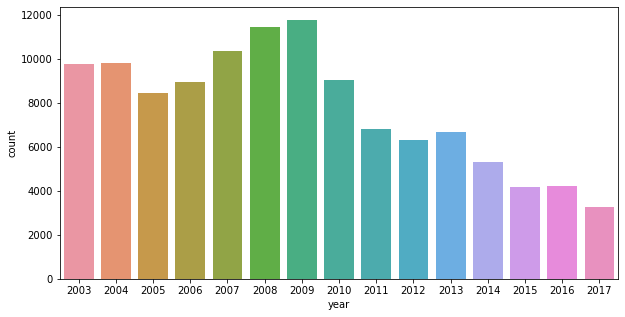

In [89]:
# supporting plot, delete later 

df['year']= df.Date.dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Category']=='DRUG/NARCOTIC'], x='year')

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* Explain in your own words: What is the problem with pie-charts?

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [6]:
randomdata = {'CENTRAL': 0.8903601342256143,
 'SOUTHERN': 0.8642882941363439,
 'BAYVIEW': 0.925634097746596,
 'MISSION': 0.7369022697287458,
 'PARK': 0.9864113307070926,
 'RICHMOND': 0.5422239624697017,
 'INGLESIDE': 0.5754056712571605,
 'TARAVAL': 0.5834730737348696,
 'NORTHERN': 0.08148199528212985,
 'TENDERLOIN': 0.37014287986350447};

randomdata = {'district': [key for key in randomdata.keys()],
              'location': [value for value in randomdata.values()]}

randomdata = pd.DataFrame(randomdata)
randomdata

district  location
0     CENTRAL      0.89
1    SOUTHERN      0.86
2     BAYVIEW      0.93
3     MISSION      0.74
4        PARK      0.99
5    RICHMOND      0.54
6   INGLESIDE      0.58
7     TARAVAL      0.58
8    NORTHERN      0.08
9  TENDERLOIN      0.37

In [7]:
from urllib.request import urlopen
import json
url = "https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson"
with urlopen(url) as response:
    data = json.load(response)

In [10]:
temp = df[(df['Category']=='VEHICLE THEFT') & (df['DayOfWeek']=='Sunday') ]
temp = temp.groupby('PdDistrict').count().reset_index()

In [12]:
min = temp.PdId.min()
max = temp.PdId.max()

import plotly.express as px

fig = px.choropleth_mapbox(temp, geojson=data, locations='PdDistrict', color='PdId',
                           color_continuous_scale="Viridis",
                           range_color=(min, max),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.733795, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">Based on data and above plots, it is safer to park car in **TENDERLION** on sunday.</font>

> * <font face="Comic sans MS" size="3" color="blue">acoording to data, one should be careful parking his/her car in **INGLESIDE** on sunday as this area has highest number of related crime history.</font>

In [13]:
import plotly.express as px

fig = px.choropleth_mapbox(temp, geojson=data, locations='PdDistrict', color='PdId',
                           color_continuous_scale="Viridis",
                           range_color=(0,100),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.733795, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
# or
import plotly.express as px

fig = px.choropleth_mapbox(temp, geojson=data, locations='PdDistrict', color='PdId',
                           color_continuous_scale="Viridis",
                           range_color=(0,max*1.5),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.733795, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue"> Perceptual errors occur when our senses misinterpret information, leading us to misunderstand or misinterpret what we are seeing, hearing, or feeling. Perceptual errors can be a problem because they can cause us to make incorrect assumptions and draw inaccurate conclusions based on the information we are receiving.</font>

> * <font face="Comic sans MS" size="3" color="blue">perceptual error is to rely too heavily on visual cues, such as the size or color of a graph, without fully understanding what the data is showing. This can lead to incorrect conclusions based on incomplete or misleading information.</font>

> * <font face="Comic sans MS" size="3" color="blue"> Perceptual errors can be especially problematic in fields such as medicine or finance, where incorrect decisions can have serious consequences. To avoid perceptual errors, it's important to be aware of the biases and limitations of our senses, and to double-check our assumptions and conclusions with objective data and analysis.</font>

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.